# **Weather Data - Kaggle - Shayan Rokhva - Predicting weather with RNN (Practice)**

### Imports

In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Data Loading

In [153]:
# 1) Mount Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [154]:
df = pd.read_csv("/content/drive/MyDrive/weather_data_kaggle_Rokhva.csv")

### Data Preparation

In [155]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [156]:
df.isnull().sum()

,0
date,0
precipitation,0
temp_max,0
temp_min,0
wind,0
weather,0


In [157]:
df.duplicated().sum()

np.int64(0)

In [158]:
#coulmn Open converted into numpy array
training_set = df.iloc[:,2:3].values
training_set

array([[12.8],
       [10.6],
       [11.7],
       ...,
       [ 7.2],
       [ 5.6],
       [ 5.6]])

In [159]:
len(training_set)

1461

In [160]:
def df_to_XY(df,window_size=10):
 X_train=[]
 y_train=[]

 for i in range(10,len(training_set)):
    X_train.append(training_set[i-10:i,0])
    y_train.append(training_set[i,0])

 X_train, y_train = np.array(X_train), np.array(y_train)
 return X_train, y_train

In [161]:
WINDOW = 10                           # I have set the window to 5
X,y = df_to_XY(df,WINDOW)
print(len(X),len(y))
X_train = X[:800]
y_train = y[:800]
X_val = X[800:1000]
y_val = y[800:1000]
X_test = X[1000:]
x_test = y[1000:]

1451 1451


In [162]:
#Reshaping(To add new dimensions)
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_val = np.reshape(X_val,(X_val.shape[0],X_val.shape[1],1))
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))


### RNN (model)

In [163]:
#Building the RNN
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [164]:
regressor = Sequential()

In [165]:
#Addinf the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units=50, return_sequences = True, input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

#Output layer
regressor.add(Dense(units=1))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Compile (Optimizer, Loss fn)**bold text**

In [166]:
#Compiling
regressor.compile(optimizer='adam',loss='mean_squared_error')

### Metrics, History, Imports, & Model Fitting (number of epochs)

In [167]:
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam


In [168]:
#fitting the rnn to the training set
history=regressor.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=200, batch_size=64)

Epoch 1/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 84ms/step - loss: 266.5361 - val_loss: 380.6000
Epoch 2/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 178.3217 - val_loss: 242.9520
Epoch 3/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 111.5206 - val_loss: 178.4690
Epoch 4/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 82.2989 - val_loss: 150.9693
Epoch 5/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 70.0507 - val_loss: 135.1474
Epoch 6/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 65.8689 - val_loss: 123.2208
Epoch 7/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 59.6798 - val_loss: 114.1092
Epoch 8/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 63.4864 - val_loss: 106.7108
Epoch 9/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 52.4269 - val_loss: 101.0260
Epoch 10/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 54.7845 - val_loss: 95.7861
Epoch 11/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 56.7471 - val_loss: 91.7098
Epoch 12/200
13/13

In [169]:
his = pd.DataFrame(history.history)

In [170]:
his.head()

,loss,val_loss
0,254.768906,380.600006
1,157.157913,242.951965
2,100.667236,178.468964
3,77.436234,150.969330
4,70.175156,135.147354


### Visualization (Valid, Test)

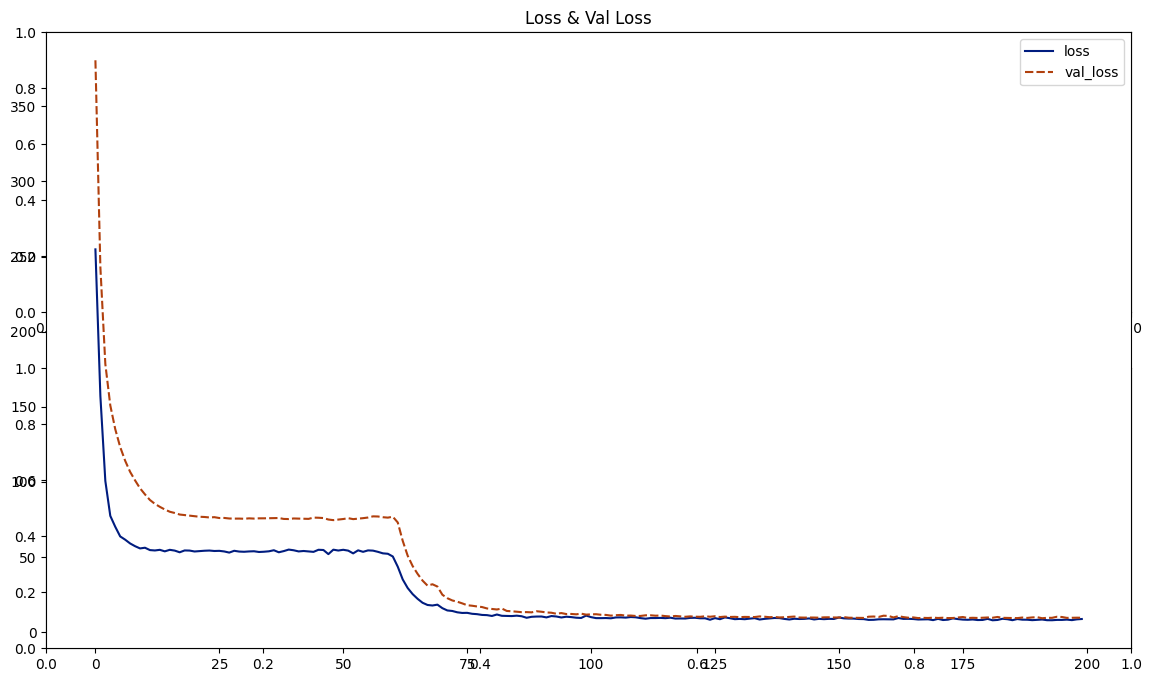

In [171]:
import seaborn as sns
his.columns
history_loss = his[['loss', 'val_loss']]


fig,axes = plt.subplots(2,1,figsize=(14,8))
plt.subplot(1,1,1)
plt.title("Loss & Val Loss")
sns.lineplot(history_loss,palette="dark");



In [172]:
train_pred = regressor.predict(X_train).flatten()
val_pred = regressor.predict(X_val).flatten()
test_pred = regressor.predict(X_test).flatten()

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 131ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


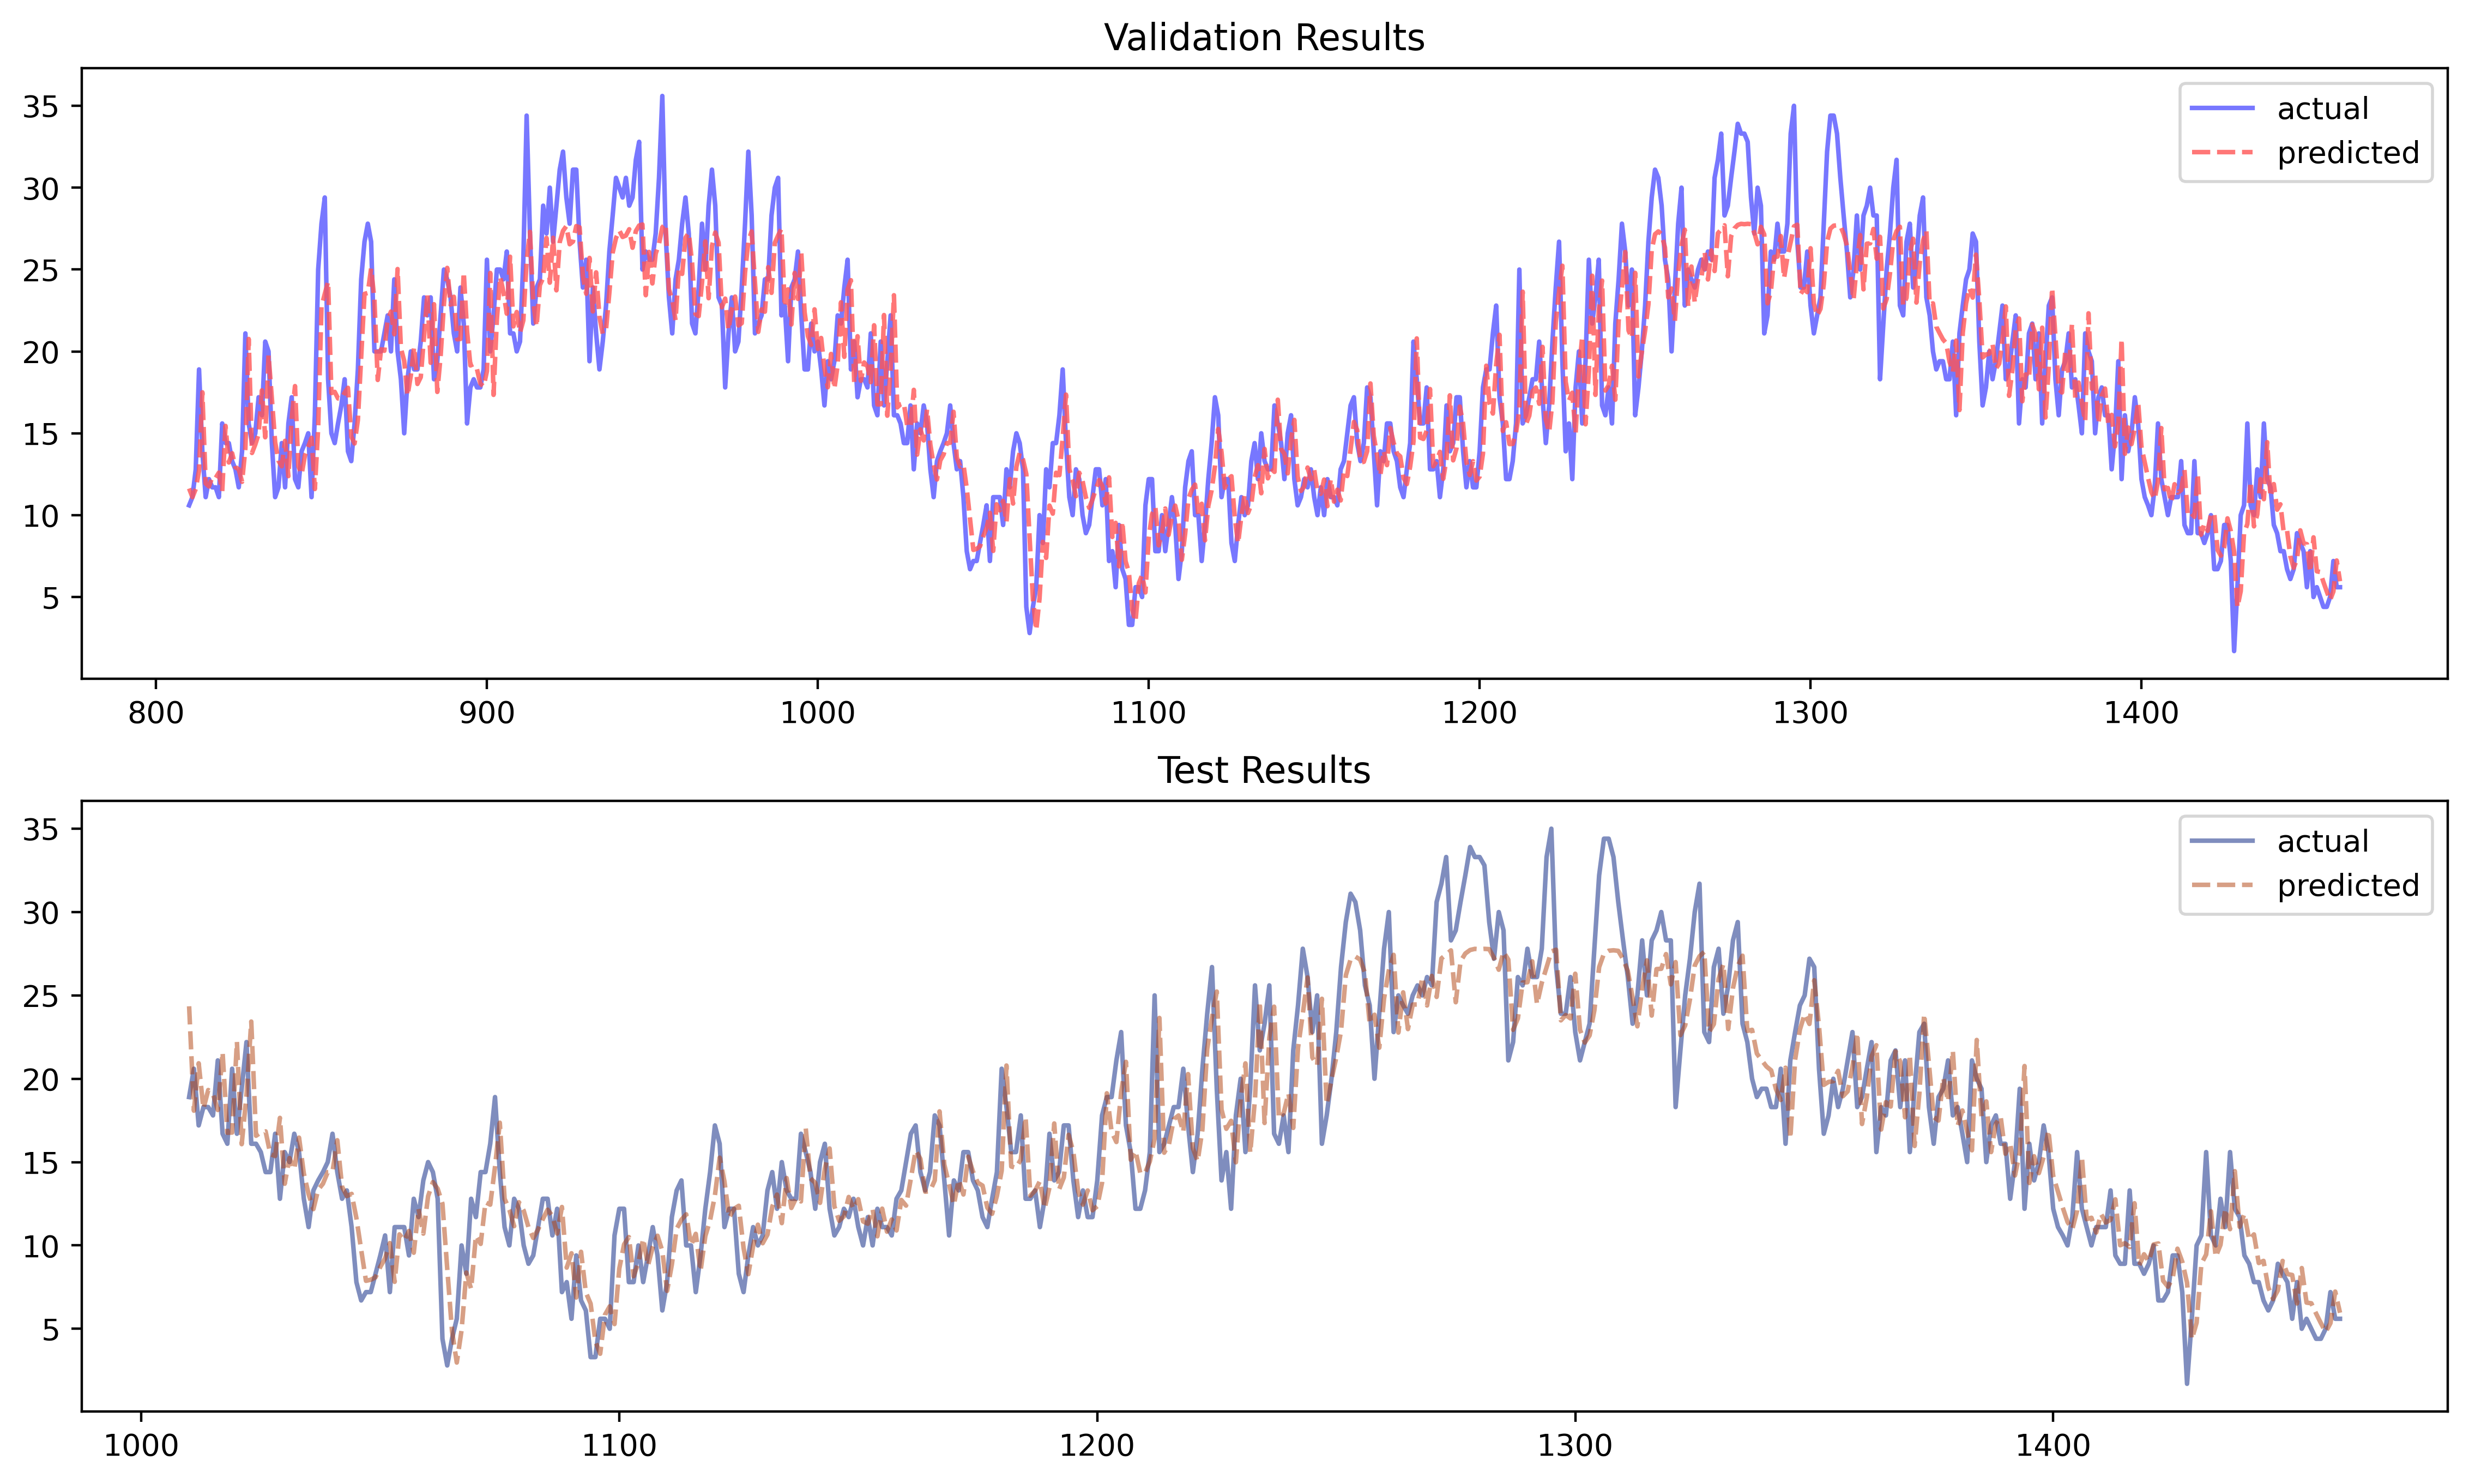

In [173]:
pred = np.concatenate([train_pred,val_pred,test_pred])
df_pred = pd.DataFrame(df["temp_max"].copy())
df_pred.columns=["actual"]
df_pred = df_pred[WINDOW:]
df_pred["predicted"] = pred

fig,axes = plt.subplots(2,1,figsize=(14,8),dpi=400)

plt.subplot(2,1,1)
plt.title("Validation Results")
sns.lineplot(df_pred[800:],alpha=0.8,palette="seismic", linestyle=None);

plt.subplot(2,1,2)
plt.title("Test Results")
sns.lineplot(df_pred[1000:],alpha=0.5,palette="dark",linestyle=None);
